# <u>Titanic: Machine Learning from Disaster

### The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

### One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## ===================== Libraries Used =======================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.metrics import confusion_matrix, jaccard_similarity_score, classification_report
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Shantanu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## ================ Data prepration and cleaning ==================

In [2]:
# importing data

data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [3]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


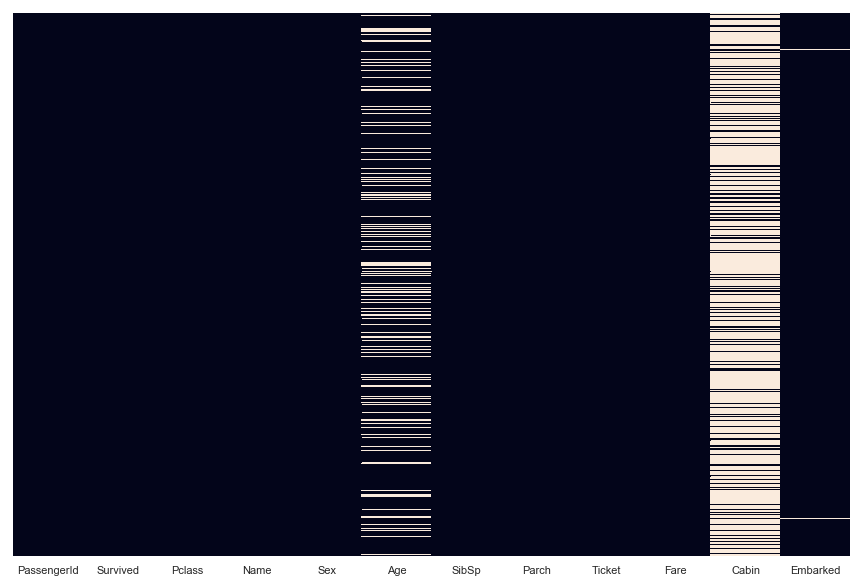

In [4]:
# analysing null values

sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data.Name.head(25)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [7]:
# feature engineering

data.Name = data.Name.str.split(",")
data.Name = data.Name.str.get(1)
data.Name = data.Name.str.split(".")
data.Name = data.Name.str.get(0)

data_test.Name = data_test.Name.str.split(",")
data_test.Name = data_test.Name.str.get(1)
data_test.Name = data_test.Name.str.split(".")
data_test.Name = data_test.Name.str.get(0)

data.Name.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Jonkheer          1
 Sir               1
 the Countess      1
 Capt              1
 Mme               1
 Ms                1
 Don               1
 Lady              1
Name: Name, dtype: int64

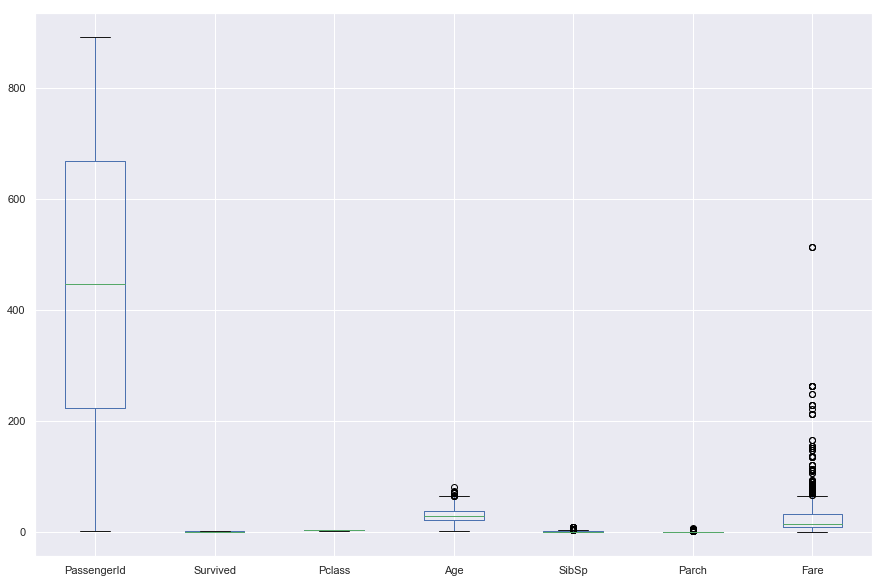

In [8]:
data.plot.box()

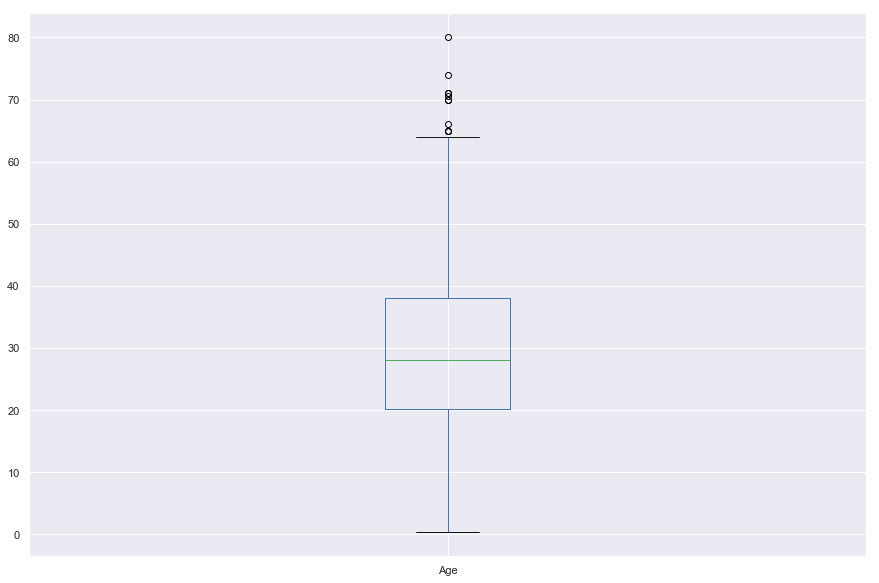

In [9]:
data.Age.plot(kind='box')

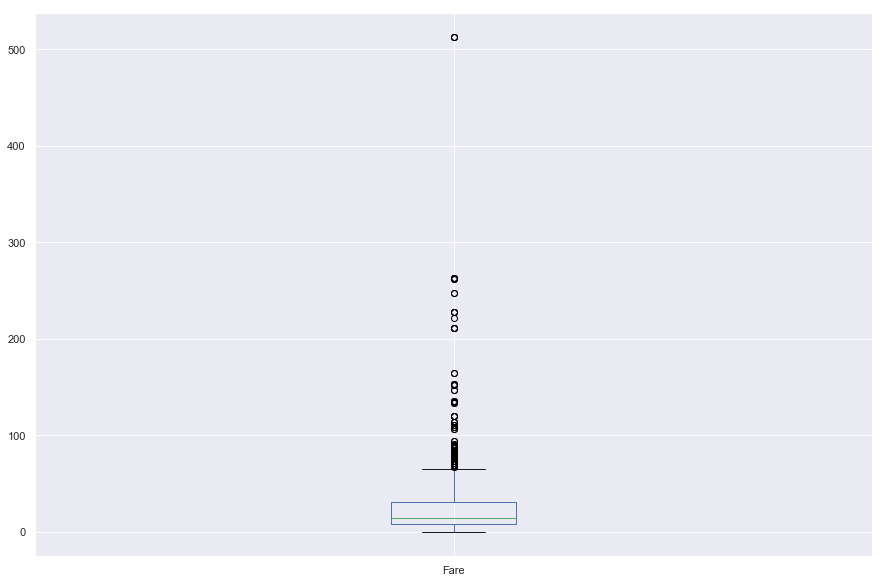

In [10]:
data.Fare.plot(kind='box')

## ================= Exploratory Data Analysis ===============

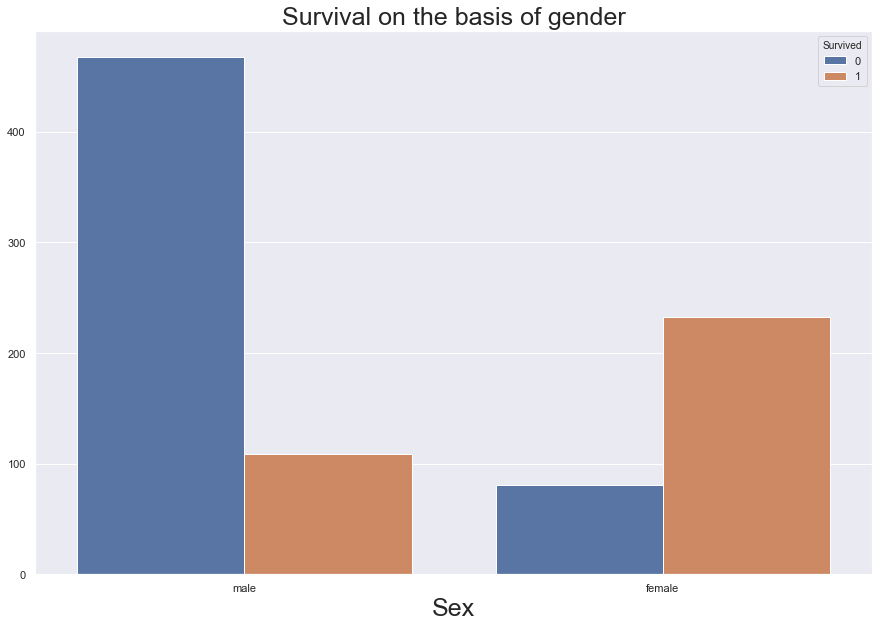

In [11]:
sns.countplot(x="Sex",data=data,hue="Survived")
_=plt.xlabel("Sex",  fontdict =  {'fontsize': 25})
_=plt.ylabel("")
_=plt.title("Survival on the basis of gender", fontdict =  {'fontsize': 25})

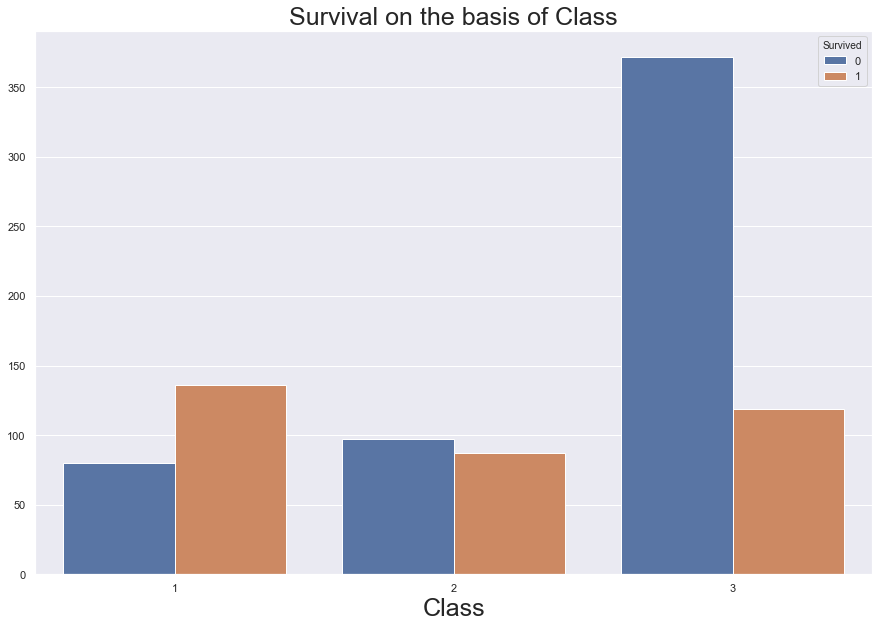

In [12]:
sns.countplot(x="Pclass",hue="Survived",data=data)
_=plt.xlabel("Class",  fontdict =  {'fontsize': 25})
_=plt.ylabel("")
_=plt.title("Survival on the basis of Class", fontdict =  {'fontsize': 25})

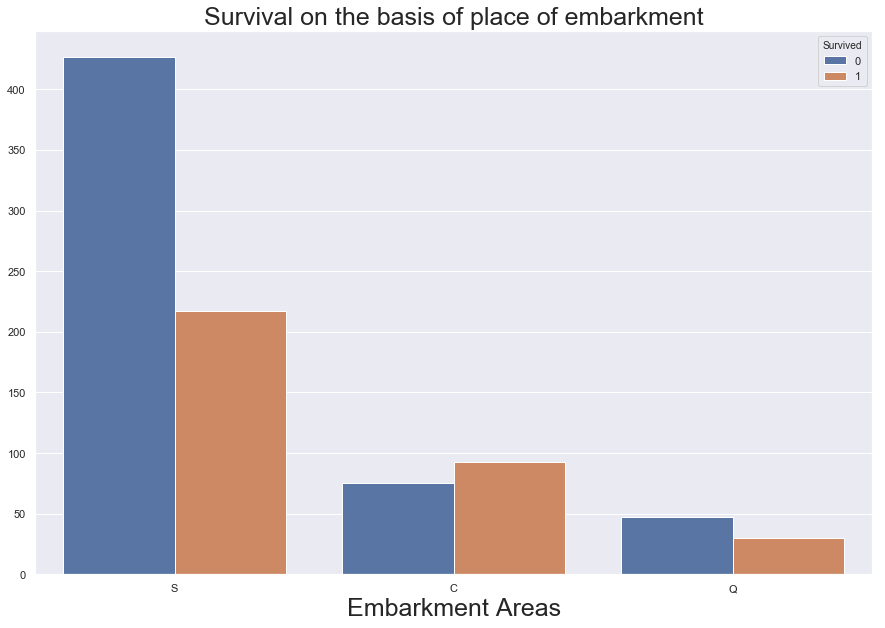

In [13]:
sns.countplot(x="Embarked",hue="Survived",data=data)
_=plt.xlabel("Embarkment Areas",  fontdict =  {'fontsize': 25})
_=plt.ylabel("")
_=plt.title("Survival on the basis of place of embarkment", fontdict =  {'fontsize': 25})

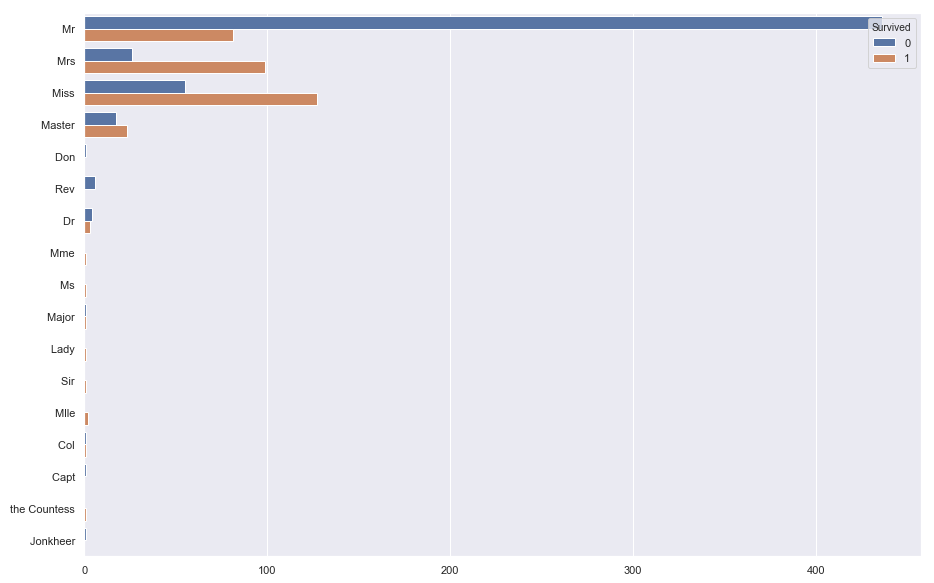

In [14]:
sns.countplot(y="Name",hue="Survived",data=data)
_=plt.xlabel("")
_=plt.ylabel("")
_=plt.title("")

In [15]:
data_test.Name.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [16]:
# feature engineering

def category(data):
    if data['Name'] == ' Mr':
        return "Mr"
    if data['Name'] == ' Mrs':
        return "Mrs"
    if data['Name'] == ' Miss':
        return "Miss"
    if data['Name'] == ' Master':
        return "Master"
    elif data["Name"] == " Mlle":
        return "Miss"
    elif data["Name"] in [' Don', ' Rev', ' Dr', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Col', ' Capt',' the Countess',
                             ' Jonkheer']:
        return "Special"
    else:
        return "Special"
    

In [17]:
data['Category']= data.apply(category,axis=1)
data_test['Category']= data_test.apply(category,axis=1)

In [18]:
data.Category.value_counts()

Mr         517
Miss       184
Mrs        125
Master      40
Special     25
Name: Category, dtype: int64

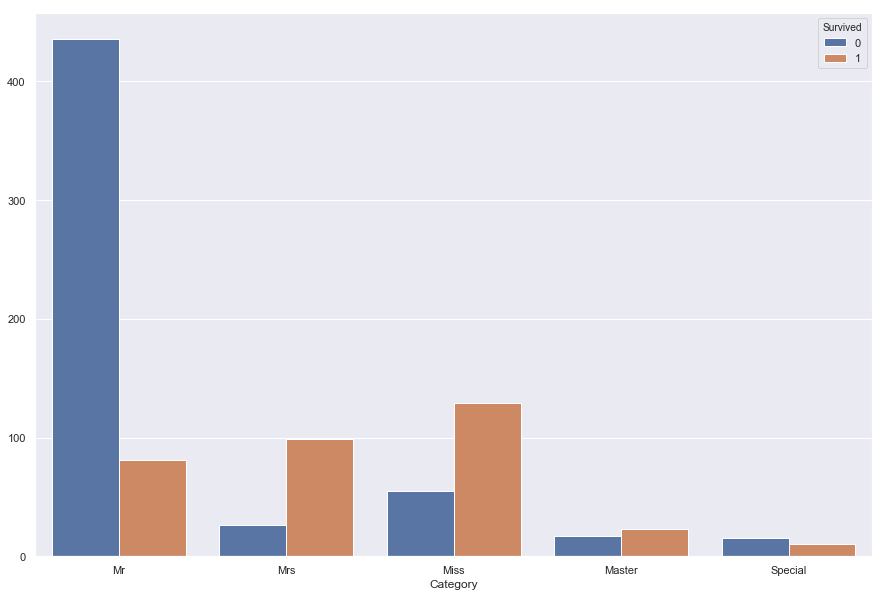

In [19]:
sns.countplot(x="Category",hue="Survived",data=data)
_=plt.ylabel("")

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Filling null values with mean/median/mode

In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Category         0
dtype: int64

In [22]:
mean_age = data.groupby("Category")["Age"].mean()

mean_age_test = data_test.groupby("Category")["Age"].mean()

mean_age

Category
Master      4.574167
Miss       21.804054
Mr         32.368090
Mrs        35.898148
Special    43.916667
Name: Age, dtype: float64

In [23]:
data['Age'].loc[data["Age"].isnull() & (data.Category == "Master")] = int(mean_age["Master"])
data['Age'].loc[data["Age"].isnull() & (data.Category == "Miss")] = int(mean_age["Miss"])
data['Age'].loc[data["Age"].isnull() & (data.Category == "Mrs")] = int(mean_age["Mrs"])
data['Age'].loc[data["Age"].isnull() & (data.Category == "Mr")] = int(mean_age["Mr"])
data['Age'].loc[data["Age"].isnull() & (data.Category == "Special")] = int(mean_age["Special"])


data_test['Age'].loc[data_test["Age"].isnull() & (data_test.Category == "Master")] = int(mean_age["Master"])
data_test['Age'].loc[data_test["Age"].isnull() & (data_test.Category == "Miss")] = int(mean_age["Miss"])
data_test['Age'].loc[data_test["Age"].isnull() & (data_test.Category == "Mrs")] = int(mean_age["Mrs"])
data_test['Age'].loc[data_test["Age"].isnull() & (data_test.Category == "Mr")] = int(mean_age["Mr"])
data_test['Age'].loc[data_test["Age"].isnull() & (data_test.Category == "Special")] = int(mean_age["Special"])

C:\Users\Shantanu\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Category         0
dtype: int64

In [25]:
data.Embarked = data.Embarked.fillna(data.Embarked.mode().iloc[0])

data_test.Embarked = data_test.Embarked.fillna(data_test.Embarked.mode().iloc[0])

data_test.Fare = data_test.Fare.fillna(data_test.Fare.mean())

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [27]:
# feature extraction

def alone(data):
    if (data.SibSp==0) and (data.Parch == 0):
        return 1
    else:
        return 0

data["Is_Alone"] = data.apply(alone, axis=1)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category,Is_Alone
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


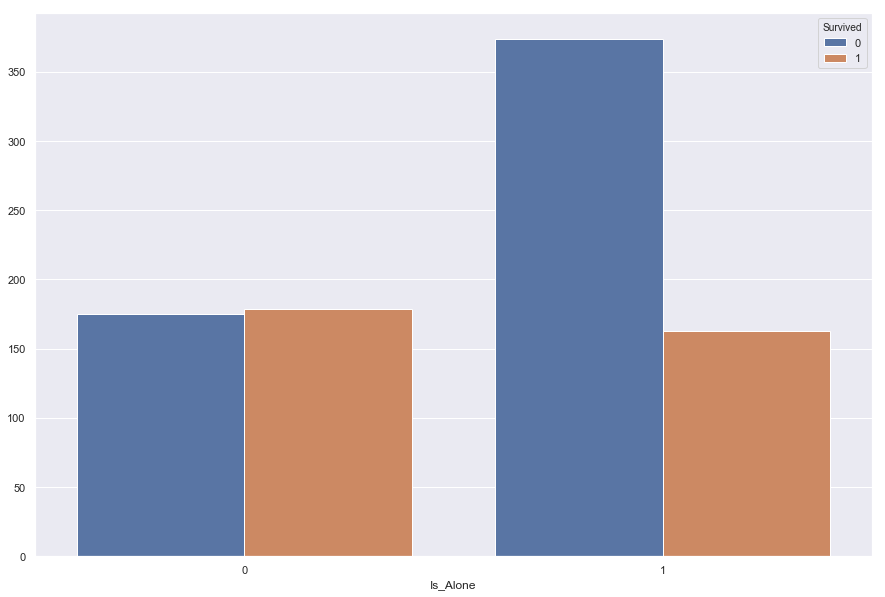

In [29]:
sns.countplot(x="Is_Alone",data=data,hue="Survived")
_=plt.ylabel("")

### By observing the plot we can say that there is not much effect of Is_Alone column over the survival. So we will not use this in our model.

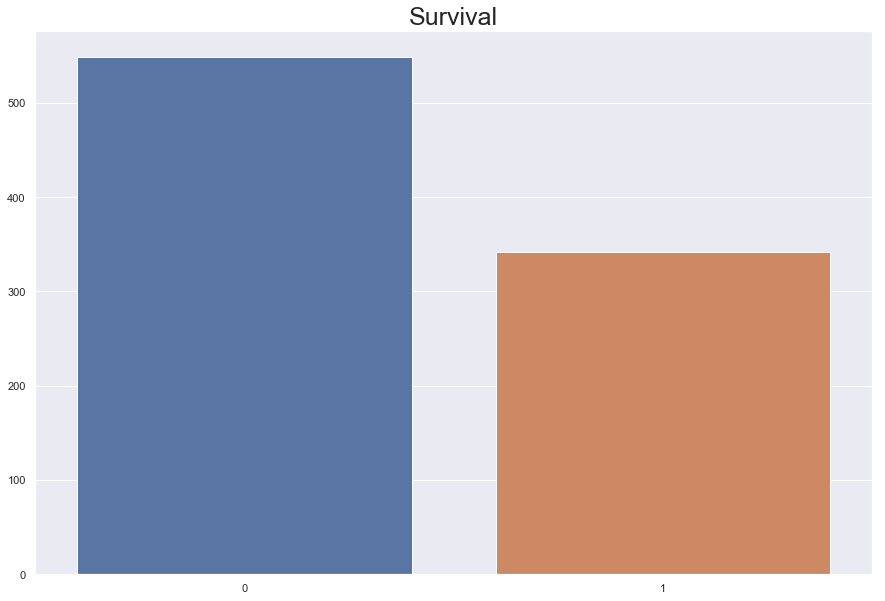

In [30]:
sns.countplot(x="Survived",data=data)
_=plt.xlabel("")
_=plt.ylabel("")
_=plt.title("Survival", fontdict =  {'fontsize': 25})

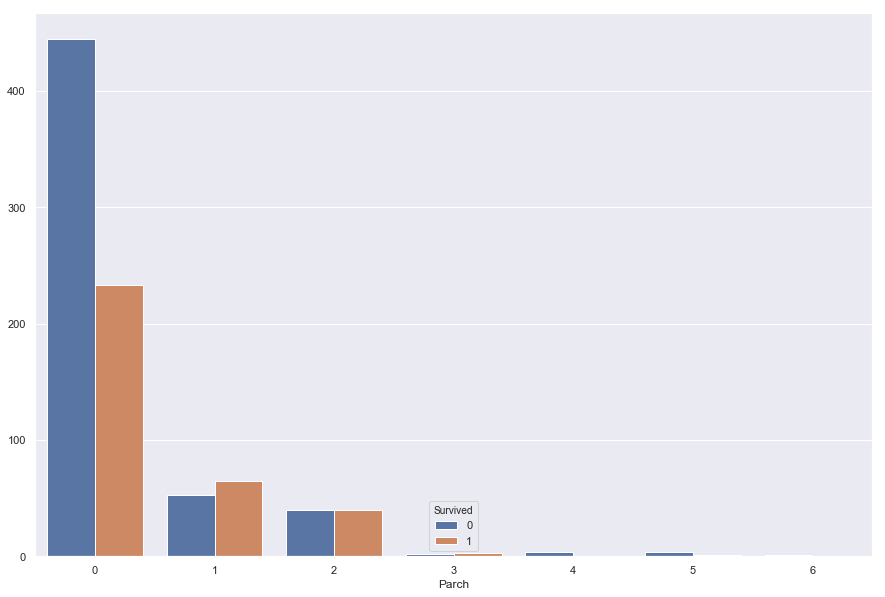

In [31]:
sns.countplot(x='Parch',hue='Survived',data=data)
_=plt.ylabel("")

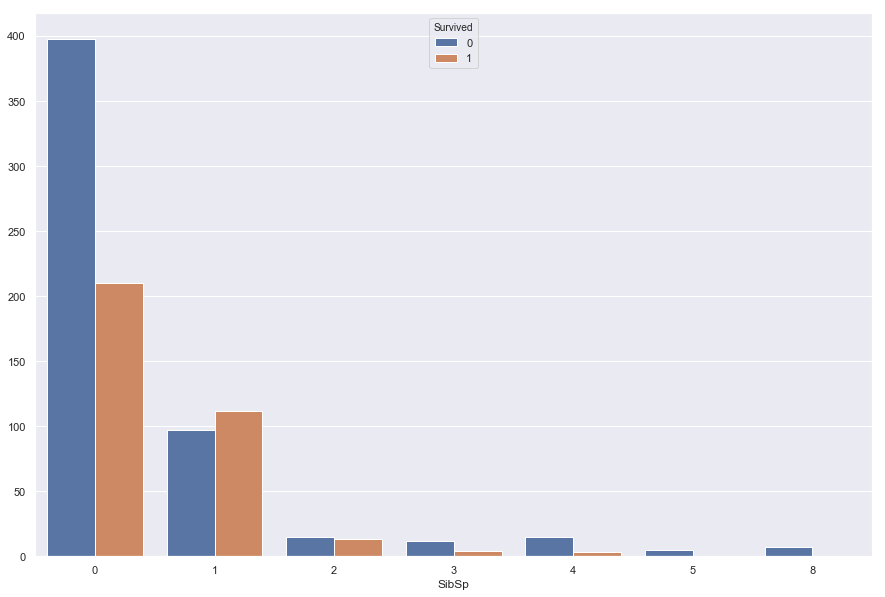

In [32]:
sns.countplot(x='SibSp',hue='Survived',data=data)
_=plt.ylabel("")

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category,Is_Alone
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [34]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


# ============= Data Preprocessing ============

In [35]:
# selecting features for model building

x = data.iloc[:,[2,4,5,6,7,9,11,12]].values
y = data.iloc[:,1].values

ID = data_test.PassengerId
data_test = data_test.iloc[:, [1,3,4,5,6,8,10,11]].values

print(x[:10])
print(y[:10])

[[3 'male' 22.0 1 0 7.25 'S' 'Mr']
 [1 'female' 38.0 1 0 71.2833 'C' 'Mrs']
 [3 'female' 26.0 0 0 7.925 'S' 'Miss']
 [1 'female' 35.0 1 0 53.1 'S' 'Mrs']
 [3 'male' 35.0 0 0 8.05 'S' 'Mr']
 [3 'male' 32.0 0 0 8.4583 'Q' 'Mr']
 [1 'male' 54.0 0 0 51.8625 'S' 'Mr']
 [3 'male' 2.0 3 1 21.075 'S' 'Master']
 [3 'female' 27.0 0 2 11.1333 'S' 'Mrs']
 [2 'female' 14.0 1 0 30.0708 'C' 'Mrs']]
[0 1 1 1 0 0 0 0 1 1]


In [36]:
# encoding categorical variables

labelencoder_x = LabelEncoder()

x[:, 1] = labelencoder_x.fit_transform(x[:,1])
x[:, 6] = labelencoder_x.fit_transform(x[:,6])
x[:, 7] = labelencoder_x.fit_transform(x[:,7])

data_test[:, 1] = labelencoder_x.fit_transform(data_test[:,1])
data_test[:, 6] = labelencoder_x.fit_transform(data_test[:,6])
data_test[:, 7] = labelencoder_x.fit_transform(data_test[:,7])

x[:10]

array([[3, 1, 22.0, 1, 0, 7.25, 2, 2],
       [1, 0, 38.0, 1, 0, 71.2833, 0, 3],
       [3, 0, 26.0, 0, 0, 7.925, 2, 1],
       [1, 0, 35.0, 1, 0, 53.1, 2, 3],
       [3, 1, 35.0, 0, 0, 8.05, 2, 2],
       [3, 1, 32.0, 0, 0, 8.4583, 1, 2],
       [1, 1, 54.0, 0, 0, 51.8625, 2, 2],
       [3, 1, 2.0, 3, 1, 21.075, 2, 0],
       [3, 0, 27.0, 0, 2, 11.1333, 2, 3],
       [2, 0, 14.0, 1, 0, 30.0708, 0, 3]], dtype=object)

In [37]:
# creating Dummy variables from categorical variables

onehotencoder = OneHotEncoder(categorical_features=[-2])
x = onehotencoder.fit_transform(x).toarray()
x = x[:,1:]

onehotencoder = OneHotEncoder(categorical_features=[-1])
x = onehotencoder.fit_transform(x).toarray()
x = x[:,1:]

onehotencoder = OneHotEncoder(categorical_features=[-2])
data_test = onehotencoder.fit_transform(data_test).toarray()
data_test = data_test[:,1:]

onehotencoder = OneHotEncoder(categorical_features=[-1])
data_test = onehotencoder.fit_transform(data_test).toarray()
data_test = data_test[:,1:]


x[:10]

array([[ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  3.    ,
         1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,
         0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  3.    ,
         0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ,  1.    ,
         0.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  3.    ,
         1.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  1.    ,  0.    ,  3.    ,
         1.    , 32.    ,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  0.    ,  1.    ,  1.    ,
         1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  3.    ,
         1.    ,  2.    ,  3.    ,  1.    , 21.075 ],


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [39]:
# normalizing the values of the columns so that all the values can come under the same scale

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# ================ Model Building ================

## LogisticRegression

In [40]:
classifier = LogisticRegression(random_state = 0)

In [41]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [42]:
confusion_matrix(y_test,y_pred)

array([[132,  17],
       [ 15,  59]], dtype=int64)

In [43]:
jaccard_similarity_score(y_test,y_pred)

0.8565022421524664

In [44]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.89      0.89       149
          1       0.78      0.80      0.79        74

avg / total       0.86      0.86      0.86       223



## K-NN 

In [45]:
classifier1 = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)

In [46]:
classifier1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
y_pred1 = classifier1.predict(x_test)

In [48]:
confusion_matrix(y_test,y_pred1)

array([[131,  18],
       [ 18,  56]], dtype=int64)

In [49]:
jaccard_similarity_score(y_test,y_pred1)

0.8385650224215246

In [50]:
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88       149
          1       0.76      0.76      0.76        74

avg / total       0.84      0.84      0.84       223



## DecisionTree

In [51]:
classifier2 = DecisionTreeClassifier(criterion='entropy', random_state=35)

In [52]:
classifier2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=35,
            splitter='best')

In [53]:
y_pred2 = classifier2.predict(x_test)

In [54]:
confusion_matrix(y_test,y_pred2)

array([[117,  32],
       [ 26,  48]], dtype=int64)

In [55]:
jaccard_similarity_score(y_test,y_pred2)

0.7399103139013453

In [56]:
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.82      0.79      0.80       149
          1       0.60      0.65      0.62        74

avg / total       0.75      0.74      0.74       223



## RandomForest

In [57]:
classifier3 = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)

In [58]:
classifier3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
y_pred3 = classifier3.predict(x_test)

In [60]:
confusion_matrix(y_test,y_pred3)

array([[124,  25],
       [ 24,  50]], dtype=int64)

In [61]:
jaccard_similarity_score(y_test,y_pred3)

0.7802690582959642

In [62]:
print(classification_report(y_test, y_pred3))

             precision    recall  f1-score   support

          0       0.84      0.83      0.84       149
          1       0.67      0.68      0.67        74

avg / total       0.78      0.78      0.78       223



## SVM

In [63]:
classifier4 = SVC(kernel='rbf', random_state=0)

In [64]:
classifier4.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
y_pred4 = classifier4.predict(x_test)

In [66]:
confusion_matrix(y_test,y_pred4)

array([[138,  11],
       [ 26,  48]], dtype=int64)

In [67]:
jaccard_similarity_score(y_test,y_pred4)

0.8340807174887892

In [68]:
print(classification_report(y_test, y_pred4))

             precision    recall  f1-score   support

          0       0.84      0.93      0.88       149
          1       0.81      0.65      0.72        74

avg / total       0.83      0.83      0.83       223



## Naive Bias

In [69]:
classifier5 = GaussianNB()

In [70]:
classifier5.fit(x_train, y_train)

GaussianNB(priors=None)

In [71]:
y_pred5 = classifier5.predict(x_test)

In [72]:
confusion_matrix(y_test,y_pred5)

array([[128,  21],
       [ 19,  55]], dtype=int64)

In [73]:
jaccard_similarity_score(y_test,y_pred5)

0.820627802690583

In [74]:
print(classification_report(y_test, y_pred5))

             precision    recall  f1-score   support

          0       0.87      0.86      0.86       149
          1       0.72      0.74      0.73        74

avg / total       0.82      0.82      0.82       223



# <u>Accuracy Comparision

## Logistic Regression  =   86%
## K-NN                            =   84%
## Decision Tree             =   74%
## Random Forest          =   78%
## SVM                             =   83%
## Naive Bias                  =    82% 